<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Downloading-and-Submitting-Data" data-toc-modified-id="Downloading-and-Submitting-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Downloading and Submitting Data</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data</a></span></li></ul></li><li><span><a href="#Understanding-the-data" data-toc-modified-id="Understanding-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Understanding the data</a></span></li><li><span><a href="#Data-preparation-and-machine-learning" data-toc-modified-id="Data-preparation-and-machine-learning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data preparation and machine learning</a></span></li><li><span><a href="#Submission" data-toc-modified-id="Submission-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Submission</a></span></li></ul></div>

Here's a simple getting started notebook that shows you how to load the data, and how to create a Kaggle submission file. Remember that you should structure your notebook after the 8 step guide, as detailed in the [Assignment 1 instructions](https://hvl.instructure.com/courses/9086/assignments/17277). 

# Downloading and Submitting Data

## Setup

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

## Data

Go to Kaggle competition website and download the data. Make a new folder in your DAT158ML repository called 'data'. Store the Kaggle competition data in this folder

Then you should uncomment the code and run the following two cells. **Warning:** This doesn't work in this Kaggle hosted notebook! See below

In [2]:
# lists the files in the folder
# import os
# print(os.listdir("data"))

In [3]:
# Reads in the csv-files and creates a dataframe using pandas

# train = pd.read_csv('data/housing_data.csv')
# benchmark = pd.read_csv('data/housing_test_data.csv')
# sampleSubmission = pd.read_csv('data/sample_submission.csv')

**Kaggle-specific way of accessing the data**

On Kaggle the data is stored in the folder `../input/dat158-2019/`:

In [4]:
base_set = pd.read_csv('../input/dat158-2019/housing_data.csv')
benchmark = pd.read_csv('../input/dat158-2019/housing_test_data.csv')
sampleSubmission = pd.read_csv('../input/dat158-2019/sample_submission.csv')

# Understanding the data

In [5]:
base_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,184000.0,NEAR BAY
1,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,172200.0,INLAND
2,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,359900.0,<1H OCEAN
3,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,258200.0,<1H OCEAN
4,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,239100.0,NEAR BAY


In [6]:
benchmark.head()

,Id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,0,-122.27,37.87,35.0,3218.0,1108.0,1675.0,1000.0,1.7464,NEAR BAY
1,1,-118.94,34.18,24.0,3689.0,585.0,1898.0,581.0,5.9224,<1H OCEAN
2,2,-119.75,36.77,32.0,1962.0,399.0,1005.0,392.0,2.6726,INLAND
3,3,-118.34,33.93,32.0,1254.0,399.0,1281.0,386.0,2.2976,<1H OCEAN
4,4,-119.00,35.36,35.0,1021.0,280.0,1258.0,239.0,1.7375,INLAND


In [7]:
base_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16344 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [8]:
benchmark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 10 columns):
Id                    4128 non-null int64
longitude             4128 non-null float64
latitude              4128 non-null float64
housing_median_age    4128 non-null float64
total_rooms           4128 non-null float64
total_bedrooms        4089 non-null float64
population            4128 non-null float64
households            4128 non-null float64
median_income         4128 non-null float64
ocean_proximity       4128 non-null object
dtypes: float64(8), int64(1), object(1)
memory usage: 322.6+ KB


In [9]:
base_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.568763,35.630270,28.714571,2636.885841,537.999755,1425.131783,499.837936,3.871083,207262.390080
std,2.003747,2.137134,12.589203,2195.840228,422.944167,1126.453504,383.400473,1.909994,115838.329585
min,-124.350000,32.540000,1.000000,6.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1445.000000,295.000000,787.000000,279.000000,2.562500,120000.000000
50%,-118.490000,34.260000,29.000000,2122.500000,434.000000,1163.000000,409.000000,3.529450,180400.000000
75%,-118.010000,37.710000,37.000000,3137.000000,646.000000,1723.000000,603.000000,4.746450,265100.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


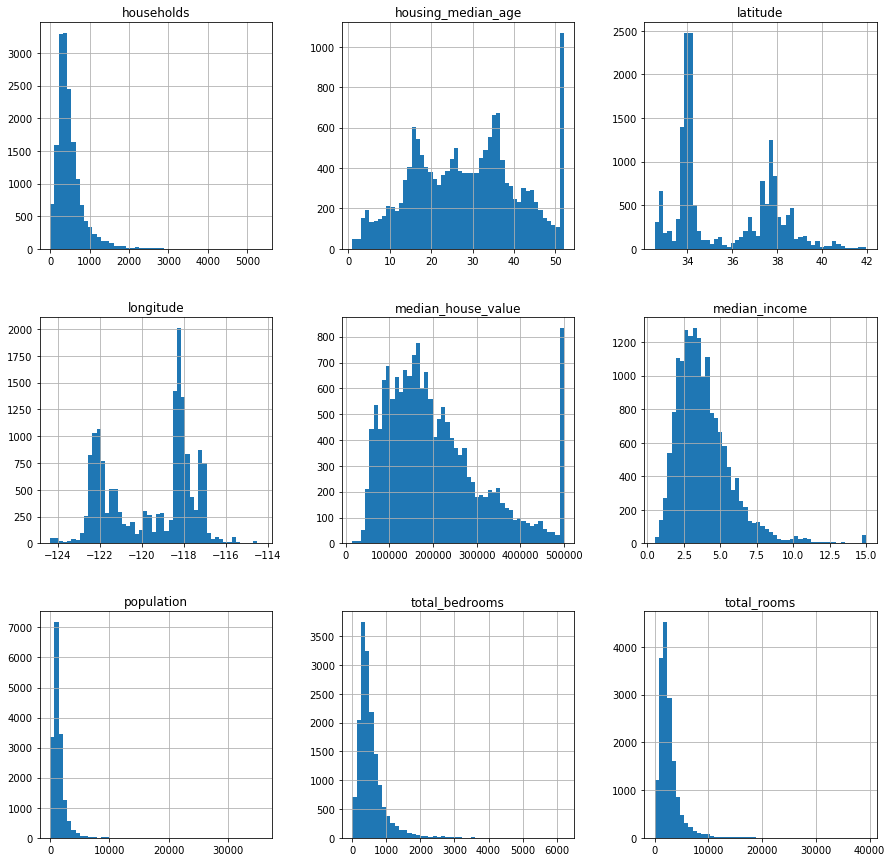

In [10]:
base_set.hist(bins=50, figsize=(15,15))
plt.show()

Scatter plot showing the distribution of housing value across California, from low (blue) to high (red).

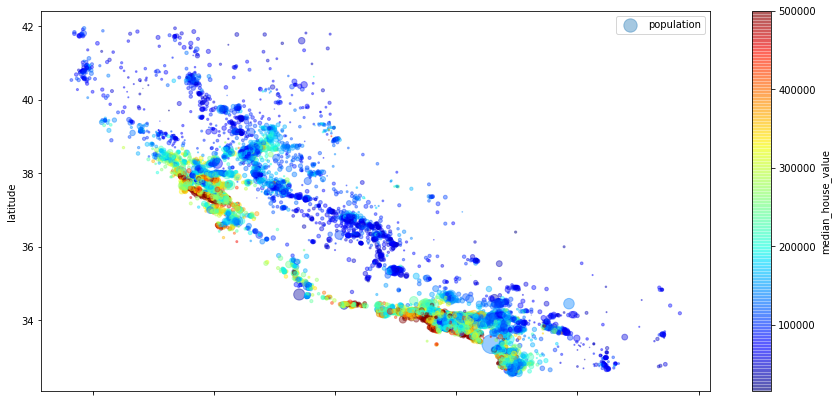

In [11]:
base_set.plot(kind="scatter", 
           x="longitude", 
           y="latitude", 
           alpha=0.4,
           s=base_set["population"]/100, 
           label="population",
           c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
           figsize=(15,7))
plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2808e4be0>,
      dtype=object)

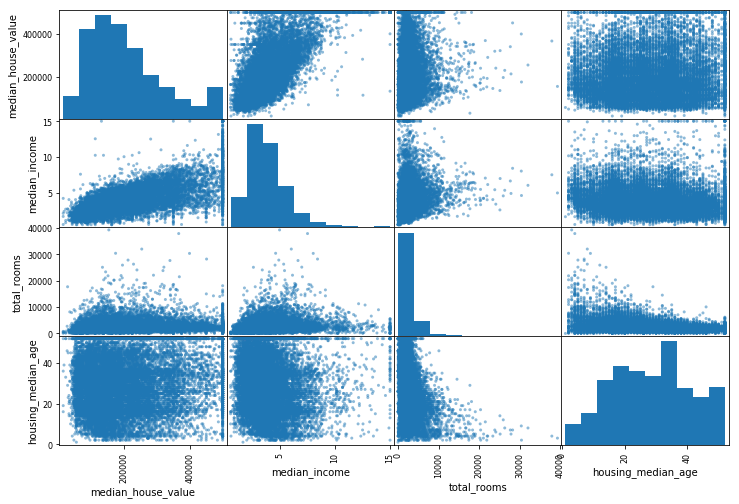

In [12]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income',
             'total_rooms', 'housing_median_age']
scatter_matrix(base_set[attributes], figsize=(12,8))

# Data preparation and machine learning

This part you should code and figure out yourself. Play around with different ways to prepare the data, different machine learning models and settings of hyperparameters

Remember to create your own validation set to evaluate your models. Your test set will not contain labels and are therefore not suited for evaluating and tuning your different models. 


## Clean up the data and separate labels and values

There are `null` values in both the main dataset and the benchmark set, which we have to clean up. This time we fill those with the median of all the other values in the column.

In [13]:
# There are null values in total_bedrooms, we fill those with the median
def fill_null(dataset, column):
    column_median = dataset[column].median()
    
    return dataset.fillna(column_median)

# test.isnull().any()

# For these particular sets, there are only null values in the 'total_bedrooms' column.
base_set = fill_null(base_set, 'total_bedrooms')
benchmark = fill_null(benchmark, 'total_bedrooms')

Then we separate the values and the labels. We are now ready to start shaping our dataset.

In [14]:
X = base_set.drop(columns=['median_house_value'])
Y = base_set['median_house_value']

## Transforming dataset

Here we derive useful datapoints from existing ones. We also use one-hot encoding to transform string columns into separate columns containing numbers.

In [15]:
def derive_datapoints(dataset):
    dataset['bedrooms_per_room'] = dataset['total_bedrooms'] / dataset['total_rooms']

    dataset['rooms_per_household'] = dataset['total_rooms'] / dataset['households']
    dataset['bedrooms_per_household'] = dataset['total_bedrooms'] / dataset['households']
    dataset['population_per_household'] = dataset['population'] / dataset['households']
    
    return dataset

X = derive_datapoints(X)
benchmark = derive_datapoints(benchmark)

# One-hot encoding
X = pd.get_dummies(X)
benchmark = pd.get_dummies(benchmark)

For this particular dataset, we also need to do a couple extra things to the benchmark set.

In [16]:
# We remove the ID column from the submission set
benchmark = benchmark.drop(columns=['Id'])

# Some housekeeping, we need to ensure the test set has the same columns as the training set
# The missing columns will be the onehot-encoded values
missing_columns = set( X.columns ) - set( benchmark.columns )

for column in missing_columns:
    benchmark[column] = 0

# Ensure the order of column in the test set is in the same order than in train set
benchmark = benchmark[X.columns]

In [17]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_room,rooms_per_household,bedrooms_per_household,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,0.181922,5.514196,1.003155,2.883281,0,0,0,1,0
1,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,0.149289,6.698413,1.000000,2.507937,0,1,0,0,0
2,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,0.180973,5.137640,0.929775,2.502809,1,0,0,0,0
3,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,0.147423,6.665217,0.982609,3.013043,1,0,0,0,0
4,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,0.251799,4.393678,1.106322,3.870690,0,0,0,1,0


In [18]:
benchmark.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_room,rooms_per_household,bedrooms_per_household,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.27,37.87,35.0,3218.0,1108.0,1675.0,1000.0,1.7464,0.344313,3.218000,1.108000,1.675000,0,0,0,1,0
1,-118.94,34.18,24.0,3689.0,585.0,1898.0,581.0,5.9224,0.158580,6.349398,1.006885,3.266781,1,0,0,0,0
2,-119.75,36.77,32.0,1962.0,399.0,1005.0,392.0,2.6726,0.203364,5.005102,1.017857,2.563776,0,1,0,0,0
3,-118.34,33.93,32.0,1254.0,399.0,1281.0,386.0,2.2976,0.318182,3.248705,1.033679,3.318653,1,0,0,0,0
4,-119.00,35.36,35.0,1021.0,280.0,1258.0,239.0,1.7375,0.274241,4.271967,1.171548,5.263598,0,1,0,0,0


## Split dataset

We split our base set into separate datasets for training, testing and validation.

In [19]:
from sklearn.model_selection import train_test_split

# First split our main set
X_train, X_validation_and_test, Y_train, Y_validation_and_test = train_test_split(X, Y, test_size=0.3)

# Then split our second set into validation and test
X_validation, X_test, Y_validation, Y_test = train_test_split(X_validation_and_test, Y_validation_and_test, test_size=0.5)

## Normalization

To make the scales of the numbers appropriate for the neural network, we have to do some scaling.

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X_scaler = MinMaxScaler().fit(X_train)
def scale_dataset_X(dataset):
    return X_scaler.transform(dataset)

Y_scaler = MinMaxScaler().fit(pd.DataFrame(Y_train))
def scale_dataset_Y(dataset):
    return Y_scaler.transform([dataset])

X_train_scaled = scale_dataset_X(X_train)
Y_train_scaled = scale_dataset_Y(Y_train)

X_validation_scaled = scale_dataset_X(X_validation)
Y_validation_scaled = scale_dataset_Y(Y_validation)

X_test_scaled = scale_dataset_X(X_test)
Y_test_scaled = scale_dataset_Y(Y_test)

## Set up and train model

Now, it is time to set up the architecture.

In [21]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(50, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(48, activation='relu'),
    Dense(50, activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1),
])

model.summary()

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                900       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1632      
_________________________________________________________________
dense_3 (Dense)              (None, 48)                1584      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2450      
_________________________________________________________________
dense_5 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total para

Let's compile and fit the model on the data.

In [22]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])

training_result = model.fit(X_train_scaled, Y_train,
                 batch_size=32,
                 epochs=250,
                 validation_data=(X_validation_scaled, Y_validation))

Train on 11558 samples, validate on 2477 samples
Epoch 1/250
11558/11558 [==============================] - 1s 116us/step - loss: 23388791833.1614 - mean_absolute_error: 116477.8108 - val_loss: 8324963069.2095 - val_mean_absolute_error: 69485.1353
Epoch 2/250
11558/11558 [==============================] - 1s 64us/step - loss: 7096710927.0614 - mean_absolute_error: 64139.7986 - val_loss: 6393459099.1296 - val_mean_absolute_error: 59713.9694
Epoch 3/250
11558/11558 [==============================] - 1s 64us/step - loss: 5588160553.8176 - mean_absolute_error: 54809.1089 - val_loss: 5678353384.0226 - val_mean_absolute_error: 55329.7995
Epoch 4/250
11558/11558 [==============================] - 1s 65us/step - loss: 5243574285.7768 - mean_absolute_error: 52352.7401 - val_loss: 5529986075.6980 - val_mean_absolute_error: 52798.1494
Epoch 5/250
11558/11558 [==============================] - 1s 66us/step - loss: 5113163733.2964 - mean_absolute_error: 51341.0210 - val_loss: 5400726369.2531 - val_

11558/11558 [==============================] - 1s 63us/step - loss: 3809749821.1760 - mean_absolute_error: 42974.7334 - val_loss: 4064539734.8147 - val_mean_absolute_error: 45468.9222
Epoch 43/250
11558/11558 [==============================] - 1s 65us/step - loss: 3799612038.9548 - mean_absolute_error: 43097.5385 - val_loss: 4017025280.9302 - val_mean_absolute_error: 44076.8412
Epoch 44/250
11558/11558 [==============================] - 1s 63us/step - loss: 3771471945.3580 - mean_absolute_error: 42753.2614 - val_loss: 4034801940.7735 - val_mean_absolute_error: 43773.6863
Epoch 45/250
11558/11558 [==============================] - 1s 64us/step - loss: 3749375482.7230 - mean_absolute_error: 42581.0211 - val_loss: 3926542309.3355 - val_mean_absolute_error: 43913.9012
Epoch 46/250
11558/11558 [==============================] - 1s 64us/step - loss: 3709501169.7692 - mean_absolute_error: 42284.7447 - val_loss: 3987207049.7667 - val_mean_absolute_error: 43646.8871
Epoch 47/250
11558/11558 [==

Epoch 84/250
11558/11558 [==============================] - 1s 63us/step - loss: 3272503436.6915 - mean_absolute_error: 39306.8726 - val_loss: 3471818179.0230 - val_mean_absolute_error: 40895.6472
Epoch 85/250
11558/11558 [==============================] - 1s 64us/step - loss: 3294620577.5560 - mean_absolute_error: 39163.7033 - val_loss: 3432213915.7497 - val_mean_absolute_error: 40530.7868
Epoch 86/250
11558/11558 [==============================] - 1s 64us/step - loss: 3282269806.7458 - mean_absolute_error: 39175.8069 - val_loss: 3529775485.5713 - val_mean_absolute_error: 40912.1966
Epoch 87/250
11558/11558 [==============================] - 1s 64us/step - loss: 3248727128.5080 - mean_absolute_error: 38994.3271 - val_loss: 3438609617.1821 - val_mean_absolute_error: 41399.6917
Epoch 88/250
11558/11558 [==============================] - 1s 64us/step - loss: 3268227783.1210 - mean_absolute_error: 39135.2693 - val_loss: 3346427917.8490 - val_mean_absolute_error: 40063.5627
Epoch 89/250
11

11558/11558 [==============================] - 1s 64us/step - loss: 3035282827.8775 - mean_absolute_error: 37505.3915 - val_loss: 3353393162.1284 - val_mean_absolute_error: 41080.1582
Epoch 126/250
11558/11558 [==============================] - 1s 65us/step - loss: 3041482602.9694 - mean_absolute_error: 37698.2388 - val_loss: 3196024585.8183 - val_mean_absolute_error: 38463.2505
Epoch 127/250
11558/11558 [==============================] - 1s 66us/step - loss: 3070766410.3769 - mean_absolute_error: 37810.3240 - val_loss: 3158720160.1938 - val_mean_absolute_error: 38943.1107
Epoch 128/250
11558/11558 [==============================] - 1s 64us/step - loss: 3047719361.1850 - mean_absolute_error: 37632.5323 - val_loss: 3140488430.0170 - val_mean_absolute_error: 39060.0322
Epoch 129/250
11558/11558 [==============================] - 1s 64us/step - loss: 3068310965.8003 - mean_absolute_error: 37753.9623 - val_loss: 3141914479.7222 - val_mean_absolute_error: 38399.1164
Epoch 130/250
11558/1155

11558/11558 [==============================] - 1s 69us/step - loss: 2811093289.4023 - mean_absolute_error: 36170.9915 - val_loss: 3318721907.2362 - val_mean_absolute_error: 39017.9349
Epoch 167/250
11558/11558 [==============================] - 1s 68us/step - loss: 2824417826.8185 - mean_absolute_error: 36165.0957 - val_loss: 2881597357.3193 - val_mean_absolute_error: 37108.4014
Epoch 168/250
11558/11558 [==============================] - 1s 69us/step - loss: 2814530380.7690 - mean_absolute_error: 36097.6741 - val_loss: 2970106689.7311 - val_mean_absolute_error: 37836.6422
Epoch 169/250
11558/11558 [==============================] - 1s 63us/step - loss: 2784015295.0891 - mean_absolute_error: 35796.5489 - val_loss: 2978569980.6928 - val_mean_absolute_error: 37858.6231
Epoch 170/250
11558/11558 [==============================] - 1s 62us/step - loss: 2820278359.8879 - mean_absolute_error: 36110.3112 - val_loss: 3000723259.5301 - val_mean_absolute_error: 37251.5171
Epoch 171/250
11558/1155

11558/11558 [==============================] - 1s 64us/step - loss: 2719265785.5435 - mean_absolute_error: 35599.9537 - val_loss: 2874008721.4146 - val_mean_absolute_error: 36869.3443
Epoch 208/250
11558/11558 [==============================] - 1s 64us/step - loss: 2703948130.5416 - mean_absolute_error: 35250.0617 - val_loss: 3570381730.8809 - val_mean_absolute_error: 44119.5349
Epoch 209/250
11558/11558 [==============================] - 1s 64us/step - loss: 2661848460.8465 - mean_absolute_error: 35152.5491 - val_loss: 2986733301.4582 - val_mean_absolute_error: 37553.3584
Epoch 210/250
11558/11558 [==============================] - 1s 64us/step - loss: 2707190206.9313 - mean_absolute_error: 35317.4321 - val_loss: 2911238813.3000 - val_mean_absolute_error: 36717.6780
Epoch 211/250
11558/11558 [==============================] - 1s 63us/step - loss: 2656598358.7140 - mean_absolute_error: 34897.5170 - val_loss: 2943672194.9455 - val_mean_absolute_error: 37283.5997
Epoch 212/250
11558/1155

11558/11558 [==============================] - 1s 64us/step - loss: 2617138914.3755 - mean_absolute_error: 34853.8281 - val_loss: 3559903854.3787 - val_mean_absolute_error: 43932.4210
Epoch 249/250
11558/11558 [==============================] - 1s 64us/step - loss: 2586757342.5991 - mean_absolute_error: 34520.9286 - val_loss: 2961213628.0985 - val_mean_absolute_error: 36341.1150
Epoch 250/250
11558/11558 [==============================] - 1s 65us/step - loss: 2637726214.8053 - mean_absolute_error: 34837.6800 - val_loss: 2983686951.9968 - val_mean_absolute_error: 36902.5034


Now, let's look into how the fitting went.

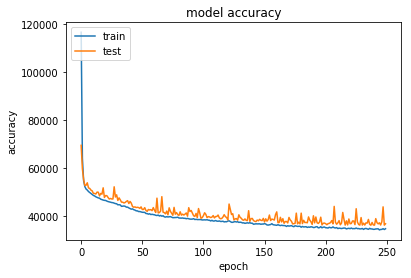

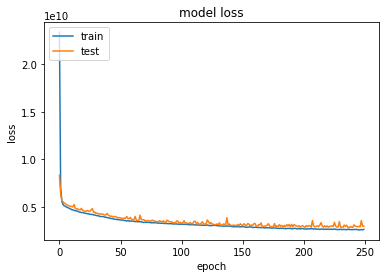

In [23]:
# Plot model accuracy over epoch
plt.plot(training_result.history['mean_absolute_error'])
plt.plot(training_result.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot model loss over epoch
plt.plot(training_result.history['loss'])
plt.plot(training_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Test model

In [24]:
validate_result = model.test_on_batch(X_validation_scaled, Y_validation)
validate_result

[2983686400.0, 36902.5]

In [25]:
test_result = model.test_on_batch(X_test_scaled, Y_test)
test_result

[2959956700.0, 36513.816]

## Use model on test set

Finally, we churn the test set through the model we created.

In [26]:
# Scale test data
benchmark_scaled = scale_dataset_X(benchmark)

#test.isnull().any()
benchmark.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_room,rooms_per_household,bedrooms_per_household,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.27,37.87,35.0,3218.0,1108.0,1675.0,1000.0,1.7464,0.344313,3.218000,1.108000,1.675000,0,0,0,1,0
1,-118.94,34.18,24.0,3689.0,585.0,1898.0,581.0,5.9224,0.158580,6.349398,1.006885,3.266781,1,0,0,0,0
2,-119.75,36.77,32.0,1962.0,399.0,1005.0,392.0,2.6726,0.203364,5.005102,1.017857,2.563776,0,1,0,0,0
3,-118.34,33.93,32.0,1254.0,399.0,1281.0,386.0,2.2976,0.318182,3.248705,1.033679,3.318653,1,0,0,0,0
4,-119.00,35.36,35.0,1021.0,280.0,1258.0,239.0,1.7375,0.274241,4.271967,1.171548,5.263598,0,1,0,0,0


In [27]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_room,rooms_per_household,bedrooms_per_household,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,0.181922,5.514196,1.003155,2.883281,0,0,0,1,0
1,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,0.149289,6.698413,1.000000,2.507937,0,1,0,0,0
2,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,0.180973,5.137640,0.929775,2.502809,1,0,0,0,0
3,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,0.147423,6.665217,0.982609,3.013043,1,0,0,0,0
4,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,0.251799,4.393678,1.106322,3.870690,0,0,0,1,0


In [28]:
median_house_value = model.predict(benchmark_scaled)

# Submission

After you have trained your model and have found predictions on your test data, you must create a csv-file that contains 'Id' and your predictions in two coloums

We have assumed that you have called your predicitons 'median_house_value' after you have trained your model

This is just for demonstrational purposes, that is why all our predictions is zero. Yours will be filled with numbers


In [29]:
len(median_house_value)

4128

In [30]:
median_house_value

array([[213828.08 ],
       [272319.97 ],
       [ 83218.77 ],
       ...,
       [ 86205.086],
       [376289.34 ],
       [122205.51 ]], dtype=float32)

In [31]:
submission = pd.DataFrame({
    'Id': [i for i in range(len(median_house_value))],
    'median_house_value': median_house_value.flatten()
})

In [32]:
submission.head()

,Id,median_house_value
0,0,213828.078125
1,1,272319.968750
2,2,83218.773438
3,3,178412.203125
4,4,55723.500000


In [33]:
# Stores a csv file to submit to the kaggle competition
submission.to_csv('submission.csv', index=False)